In [1]:
import json

business=[]
with open('../Data/raw/yelp_academic_dataset_business.json',encoding='utf-8') as f:
    for line in f:
        business.append(json.loads(line))
    
print(business[0])
    

{'business_id': 'Apn5Q_b6Nz61Tq4XzPdf9A', 'name': 'Minhas Micro Brewery', 'neighborhood': '', 'address': '1314 44 Avenue NE', 'city': 'Calgary', 'state': 'AB', 'postal_code': 'T2E 6L6', 'latitude': 51.0918130155, 'longitude': -114.031674872, 'stars': 4.0, 'review_count': 24, 'is_open': 1, 'attributes': {'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}, 'categories': 'Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel', 'hours': {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}}


In [2]:
print("No of businesses ",len(business))
price=[]
init_stars=[]
for i in range(0,len(business)):
    #print(i," stars: ",business[i]['stars'])
    if(business[i]['attributes'] is not None and 'RestaurantsPriceRange2' in business[i]['attributes'].keys()):
        #print(i," price: ",business[i]['attributes']['RestaurantsPriceRange2'])
        price.append(int(business[i]['attributes']['RestaurantsPriceRange2']))
        init_stars.append(business[i]['stars'])
        
print("No of businesses with star and price ratings ",len(price))
#print(len(init_stars))

No of businesses  188593
No of businesses with star and price ratings  107120


In [75]:
x_mean = np.mean(init_stars)
x_var = np.std(init_stars)
print(x_mean, x_var)

n_mean = np.mean(nstars)
n_var = np.std(nstars)
print(n_mean, n_var)

#

3.575896191187453 0.877730796676484
1.5548097205206075e-16 1.0


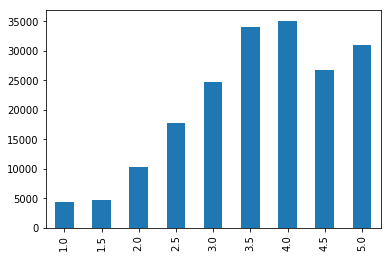

In [4]:
import pandas as pd
df = pd.DataFrame(business)
stars=[1,1.5,2,2.5,3,3.5,4,4.5,5]
#print(df.head(1))
df['stars'].value_counts().reindex(stars).plot(kind='bar')


For star ratings:
Mean 3.58
SD 0.88


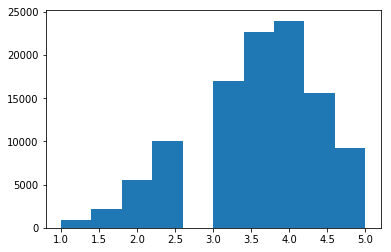

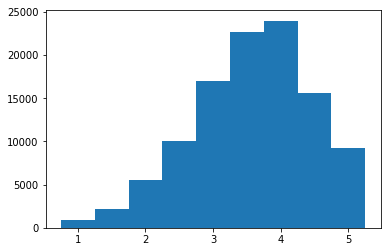

After z-normalization 
Mean  0.0
SD  1.0


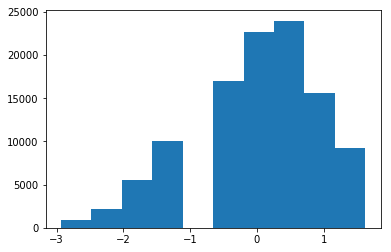

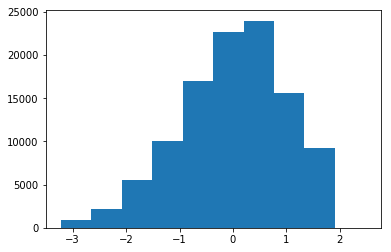

In [8]:
import matplotlib.pyplot as plt
import collections
import numpy as np
mean=np.mean(init_stars)
std=np.std(init_stars)
nstars=[]
print("For star ratings:")
print("Mean", round(mean,2))
print("SD", round(std,2))

for i in range(0,len(init_stars)):
    nstars.append((init_stars[i]-mean)/std)

#print(collections.Counter(init_stars))
plt.hist(init_stars)
plt.show()

d = np.diff(np.unique(init_stars)).min()
left_of_first_bin = np.min(init_stars) - float(d)/2
right_of_last_bin = np.max(init_stars) + float(d)/2
plt.hist(init_stars, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

print("After z-normalization ")
print("Mean ",round(np.mean(nstars),2))
print("SD ",np.std(nstars))

#plt.hist(nstars,bins=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2])
#plt.show()
plt.hist(nstars)
plt.show()

#print(collections.Counter(nstars))

d = np.diff(np.unique(nstars)).min()
left_of_first_bin = np.min(nstars) - float(d)/2
right_of_last_bin = np.max(nstars) + float(d)/2
plt.hist(nstars, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

For price ratings:
Mean  1.8237023898431666
SD  0.6782771773781116


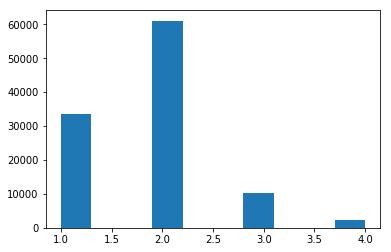

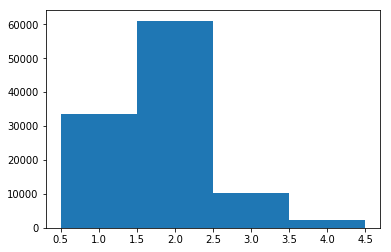

After z-normalization 
Mean  -1.608538213422557e-17
SD  1.0


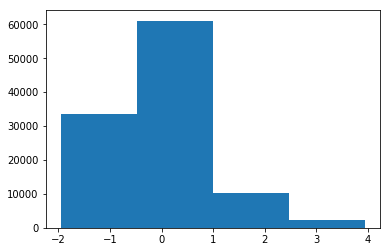

In [9]:
import numpy as np
import matplotlib.pyplot as plt

print("For price ratings:")
print("Mean ",np.mean(price))
print("SD ",np.std(price))
pmean=np.mean(price)
pstd=np.std(price)
plt.hist(price)
plt.show()
d = np.diff(np.unique(price)).min()
left_of_first_bin = np.min(price) - float(d)/2
right_of_last_bin = np.max(price) + float(d)/2
plt.hist(price, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

nprice=[]
for i in range(0,len(price)):
    nprice.append((price[i]-pmean)/pstd)
    
print("After z-normalization ")

print("Mean ",np.mean(nprice))
print("SD ",np.std(nprice))
d = np.diff(np.unique(nprice)).min()
left_of_first_bin = np.min(nprice) - float(d)/2
right_of_last_bin = np.max(nprice) + float(d)/2
plt.hist(nprice, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()
#df.plot(x='stars',y='review_count',style='o')
#df['stars'].value_counts().reindex(stars).plot(kind='bar')